### AutoIgnition Delay for 0.625 % R-Xylene in Batch Reactor Using the Chemkin Format File

### Importing the Libraries

In [1]:
from __future__ import division
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

import cantera as ct
print('Runnning Cantera version: ' + ct.__version__)

Runnning Cantera version: 2.5.1


### Creating the Ideal Gas Reactor 

In [2]:
gas = ct.Solution('xylene.cti')

reactorTemperature = 1500 #Kelvin
reactorPressure = 8*101325.0 #Pascals

gas.TPX = reactorTemperature, reactorPressure , 'RXYLENE: 0.00625, o2 :0.06562, Ar:0.92812'


r = ct.IdealGasReactor(contents=gas, name='Batch Reactor')
reactorNetwork = ct.ReactorNet([r])


stateVariableNames = [r.component_name(item) for item in range(r.n_vars)]

### Creating the Dataframes

In [3]:
timeHistory = pd.DataFrame(columns=stateVariableNames)

def ignitionDelay(df, species):
    return df[species].idxmax()

T = np.arange(1428.57, 1691.66,20)

estimatedIgnitionDelayTimes = np.ones(len(T))


estimatedIgnitionDelayTimes[:6] = 6*[0.01]
estimatedIgnitionDelayTimes[-2:] = 1
estimatedIgnitionDelayTimes[-1] = 10


ignitionDelays = pd.DataFrame(data={'T': T})
ignitionDelays['ignDelay'] = np.nan

In [4]:
for i, temperature in enumerate(T):
    reactorTemperature = temperature
    reactorPressure = 6*101325.0
    gas.TPX = reactorTemperature, reactorPressure,  'RXYLENE: 0.00625, o2 :0.06562, Ar:0.92812'
    r = ct.IdealGasReactor(contents=gas, name='Batch Reactor')
    reactorNetwork = ct.ReactorNet([r])

    timeHistory = pd.DataFrame(columns=timeHistory.columns)

    t0 = time.time()

    t = 0
    counter = 0
    while t < estimatedIgnitionDelayTimes[i]:
        t = reactorNetwork.step()
        if not counter % 20:
            timeHistory.loc[t] = r.get_state()
        counter += 1

    tau = ignitionDelay(timeHistory, 'OH')
    t1 = time.time()

    print('Computed Ignition Delay: {:.3e} seconds for T={}K. Took {:3.2f}s to compute'.format(tau, temperature, t1-t0))

    ignitionDelays.at[i, 'ignDelay'] = tau

Computed Ignition Delay: 1.635e-04 seconds for T=1428.57K. Took 20.12s to compute
Computed Ignition Delay: 1.398e-04 seconds for T=1448.57K. Took 40.38s to compute
Computed Ignition Delay: 1.197e-04 seconds for T=1468.57K. Took 18.63s to compute
Computed Ignition Delay: 1.030e-04 seconds for T=1488.57K. Took 28.91s to compute
Computed Ignition Delay: 8.921e-05 seconds for T=1508.57K. Took 26.45s to compute
Computed Ignition Delay: 7.743e-05 seconds for T=1528.57K. Took 45.94s to compute
Computed Ignition Delay: 6.731e-05 seconds for T=1548.57K. Took 28.21s to compute
Computed Ignition Delay: 5.871e-05 seconds for T=1568.57K. Took 28.55s to compute
Computed Ignition Delay: 5.150e-05 seconds for T=1588.57K. Took 44.34s to compute
Computed Ignition Delay: 4.561e-05 seconds for T=1608.57K. Took 34.32s to compute
Computed Ignition Delay: 4.036e-05 seconds for T=1628.57K. Took 35.48s to compute
Computed Ignition Delay: 3.563e-05 seconds for T=1648.57K. Took 35.55s to compute
Computed Ignitio

### Ploting and DataFraming the Ignition Delay with Temperature

Text(0.5, 1.0, 'For RXylene, For 0.625%')

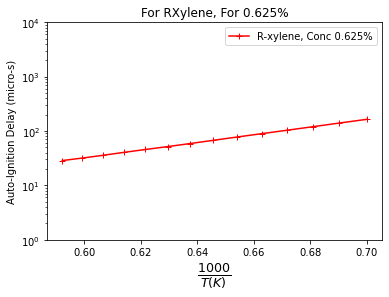

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogy(1000/ignitionDelays['T'], (ignitionDelays['ignDelay']*(1000000)), '+-',color ='r')
ax.set_ylabel('Auto-Ignition Delay (micro-s)')
ax.set_xlabel(r'$\frac{1000}{T (K)}$', fontsize=18)
ignitionDelays['ignDelay']*(1000000)
ax.set_ylim([1, 10000])
ax.legend(['R-xylene, Conc 0.625%'])
ax.set_title("For RXylene, For 0.625%")

In [7]:
ignitionDelays

,T,ignDelay
0,1428.57,0.000164
1,1448.57,0.000140
2,1468.57,0.000120
3,1488.57,0.000103
4,1508.57,0.000089
5,1528.57,0.000077
6,1548.57,0.000067
7,1568.57,0.000059
8,1588.57,0.000051
9,1608.57,0.000046
